TensorFlow version: 2.19.0
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

--- Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3562 - loss: 1.7336 - val_accuracy: 0.5611 - val_loss: 1.2334
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5849 - loss: 1.1701 - val_accuracy: 0.6223 - val_loss: 1.0726
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.6629 - loss: 0.9676 - val_accuracy: 0.6539 - val_loss: 0.9742
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6999 - loss: 0.8643 - val_accuracy: 0.6802 - val_loss: 0.9240
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7228 - loss: 0.7848 - val_accuracy: 0.7112 - val_loss: 0.8366
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7424 - loss: 0.7350 - val_accuracy: 0.7031 - val_loss: 0.8780
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 50ms/step - accuracy: 0.7610 - loss: 0.6766 - val_accuracy: 0.6989 - val_loss: 0.8696
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7

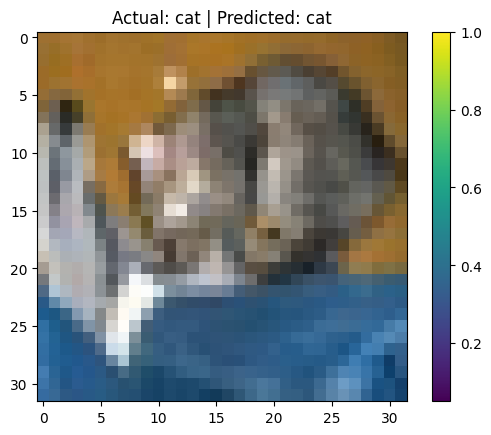

In [1]:
# Step 1: Import all the necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# --- Step 2: Load and Prepare the Data ---
# Load the CIFAR-10 dataset which contains 60,000 32x32 color images in 10 classes
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values from 0-255 to be between 0 and 1. This helps the model train faster.
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the human-readable names for the 10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# --- Step 3: Build the Convolutional Neural Network (CNN) Model ---
# We will build a stack of Conv2D and MaxPooling2D layers.
model = models.Sequential()
# Layer 1: Convolutional layer with 32 filters, followed by a max-pooling layer.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Layer 2: Another convolutional and max-pooling layer.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Layer 3: A final convolutional layer.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D to feed it into the dense layers.
model.add(layers.Flatten())
# A dense layer with 64 neurons.
model.add(layers.Dense(64, activation='relu'))
# The final output layer with 10 neurons (one for each class).
model.add(layers.Dense(10))

# Print a summary of the model to see the architecture
print("\n--- Model Summary ---")
model.summary()

# --- Step 4: Compile and Train the Model ---
# Compile the model with an optimizer, loss function, and metrics to monitor.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the training data for 10 epochs.
# An epoch is one full pass through the entire training dataset.
print("\n--- Starting Model Training ---")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
print("--- Model Training Finished ---")


# --- Step 5: Evaluate the Model's Accuracy ---
print("\n--- Evaluating Model Performance ---")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# --- Bonus: Make a Prediction ---
# Let's predict the class for the first image in the test set.
print("\n--- Making a Prediction ---")
# The model's output is a set of "logits" or "scores" for each class.
predictions = model.predict(test_images)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]
actual_class_name = class_names[test_labels[0][0]]

print(f"Predicted class for the first test image: {predicted_class_name}")
print(f"Actual class for the first test image:   {actual_class_name}")

# You can also visualize the image
plt.figure()
plt.imshow(test_images[0])
plt.title(f"Actual: {actual_class_name} | Predicted: {predicted_class_name}")
plt.colorbar()
plt.grid(False)
plt.show()